In [1]:
import cv2 as cv
import math

In [2]:
import matplotlib.pyplot as plt

In [3]:
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

In [4]:
inWidth = 368
inHeight = 368
thr = 0.2

In [5]:
    BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                   "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                   "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                   "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }
    BODY_PART1 = { "Nose": 0 }

    POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
                   ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
                   ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
                   ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
                   ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]
    print(len(BODY_PARTS))
    print(len(BODY_PART1))

19
1


In [6]:
BODY_PART2 = { "NE": 1 }
element = next(iter(BODY_PART2))
print(element)
print(len(element))

NE
2


In [7]:
img = cv.imread("lean_pose1.jpg")

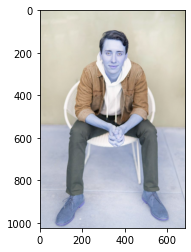

In [8]:
plt.imshow(img)

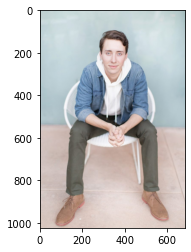

In [9]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [10]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inp = cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight),(127.5, 127.5, 127.5), swapRB=True, crop=False)
    net.setInput(inp)
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        print("x=",x)
        print("y=",y)
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)
        
    for i in range(len(BODY_PART1)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x1 = (frameWidth * point[0]) / out.shape[3]
        y1 = (frameHeight * point[1]) / out.shape[2]
        print("       ")
        print("x1=",x1)
        print("y1=",y1)
    for i in range(len(element)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x2 = (frameWidth * point[0]) / out.shape[3]
        y2 = (frameHeight * point[1]) / out.shape[2]
        print("       ")
        print("x2=",x2)
        print("y2=",y2)
        print(" ")
    distance = ((((x2-x1)**2)+((y2-y1)**2))**0.5)
    print("the distance between them is ", distance)
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]
        
        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 0, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (255, 255, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return frame
    return distance

In [11]:
expected_image = pose_estimation(img)

x= 341.5
y= 222.6086956521739
x= 341.5
y= 289.39130434782606
x= 237.56521739130434
y= 289.39130434782606
x= 178.17391304347825
y= 467.4782608695652
x= 296.95652173913044
y= 534.2608695652174
x= 445.4347826086956
y= 289.39130434782606
x= 475.1304347826087
y= 445.2173913043478
x= 371.19565217391306
y= 556.5217391304348
x= 282.10869565217394
y= 534.2608695652174
x= 178.17391304347825
y= 556.5217391304348
x= 163.32608695652175
y= 845.9130434782609
x= 371.19565217391306
y= 534.2608695652174
x= 519.6739130434783
y= 556.5217391304348
x= 504.82608695652175
y= 823.6521739130435
x= 311.80434782608694
y= 200.34782608695653
x= 371.19565217391306
y= 200.34782608695653
x= 282.10869565217394
y= 200.34782608695653
x= 400.89130434782606
y= 200.34782608695653
x= 0.0
y= 957.2173913043479
       
x1= 341.5
y1= 222.6086956521739
       
x2= 341.5
y2= 222.6086956521739
 
       
x2= 341.5
y2= 289.39130434782606
 
the distance between them is  66.78260869565216


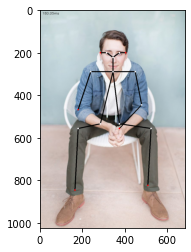

In [12]:
plt.imshow(cv.cvtColor(expected_image, cv.COLOR_BGR2RGB))

In [13]:
lean = cv.VideoCapture('lean.gif')
lean.set(3,800)
lean.set(4,800)

if not lean.isOpened():
    lean = cv.VideoCapture(0)
if not lean.isOpened():
    raise IOError("can't open the video file")
    
while cv.waitKey(1) < 0:
    hasFrame,frame = lean.read()
    if not hasFrame:
        cv.WaitKey()
        break
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inp = cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight),(127.5, 127.5, 127.5), swapRB=True, crop=False)
    net.setInput(inp)
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)
        
    for i in range(len(BODY_PART1)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x1 = (frameWidth * point[0]) / out.shape[3]
        y1 = (frameHeight * point[1]) / out.shape[2]
        print("       ")
        print("x1=",x1)
        print("y1=",y1)
        
    for i in range(len(element)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x2 = (frameWidth * point[0]) / out.shape[3]
        y2 = (frameHeight * point[1]) / out.shape[2]
        print("       ")
        print("x2=",x2)
        print("y2=",y2)
    distance = ((((x2-x1)**2)+((y2-y1)**2))**0.5)
    print("the distance between them is ", distance)
    
    for i in range(len('lean.gif')):
        if distance <71:
            text = "bend pose detected: {}".format(distance)
            cv.putText(frame, text, (10, frame.shape[0] - 25),cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),2)
            print("detected")
        else:
            text1 = "bend pose not detected: {}".format(distance)
            cv.putText(frame, text1, (10, frame.shape[0] - 25),cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),2)
            print("not detected")

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]
        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    
    cv.imshow('video executed successfully ', frame)
  
    

       
x1= 313.04347826086956
y1= 58.69565217391305
       
x2= 313.04347826086956
y2= 58.69565217391305
       
x2= 328.69565217391306
y2= 129.1304347826087
the distance between them is  72.15295662229215
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
       
x1= 313.04347826086956
y1= 58.69565217391305
       
x2= 313.04347826086956
y2= 58.69565217391305
       
x2= 328.69565217391306
y2= 129.1304347826087
the distance between them is  72.15295662229215
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
       
x1= 313.04347826086956
y1= 58.69565217391305
       
x2= 313.04347826086956
y2= 58.69565217391305
       
x2= 344.3478260869565
y2= 117.3913043478261
the distance between them is  66.52173913043478
detected
detected
detected
detected
detected
detected
detected
detected
       
x1= 313.04347826086956
y1= 58.69565217391305
       
x2= 313.04347826086956
y2= 58.695652173

       
x1= 281.7391304347826
y1= 58.69565217391305
       
x2= 281.7391304347826
y2= 58.69565217391305
       
x2= 328.69565217391306
y2= 117.3913043478261
the distance between them is  75.16711061334213
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
       
x1= 281.7391304347826
y1= 70.43478260869566
       
x2= 281.7391304347826
y2= 70.43478260869566
       
x2= 313.04347826086956
y2= 117.3913043478261
the distance between them is  56.43471561595808
detected
detected
detected
detected
detected
detected
detected
detected
       
x1= 281.7391304347826
y1= 70.43478260869566
       
x2= 281.7391304347826
y2= 70.43478260869566
       
x2= 313.04347826086956
y2= 117.3913043478261
the distance between them is  56.43471561595808
detected
detected
detected
detected
detected
detected
detected
detected
       
x1= 266.0869565217391
y1= 70.43478260869566
       
x2= 266.0869565217391
y2= 70.43478260869566
       
x2= 313.04347826086956
y2

       
x1= 203.47826086956522
y1= 187.82608695652175
       
x2= 203.47826086956522
y2= 187.82608695652175
       
x2= 266.0869565217391
y2= 199.56521739130434
the distance between them is  63.69973276734667
detected
detected
detected
detected
detected
detected
detected
detected
       
x1= 203.47826086956522
y1= 199.56521739130434
       
x2= 203.47826086956522
y2= 199.56521739130434
       
x2= 266.0869565217391
y2= 199.56521739130434
the distance between them is  62.60869565217391
detected
detected
detected
detected
detected
detected
detected
detected
       
x1= 203.47826086956522
y1= 199.56521739130434
       
x2= 203.47826086956522
y2= 199.56521739130434
       
x2= 266.0869565217391
y2= 199.56521739130434
the distance between them is  62.60869565217391
detected
detected
detected
detected
detected
detected
detected
detected
       
x1= 219.1304347826087
y1= 211.30434782608697
       
x2= 219.1304347826087
y2= 211.30434782608697
       
x2= 266.0869565217391
y2= 211.3043478260869

AttributeError: module 'cv2.cv2' has no attribute 'WaitKey'

In [14]:
lean = cv.VideoCapture(0)
lean1 = cv.VideoCapture('video2.mp4')

lean.set(cv.CAP_PROP_FPS,10)
lean.set(3,800)
lean.set(4,800)

if not lean.isOpened():
    lean = cv.VideoCapture(0)
if not lean.isOpened():
    raise IOError("can't access and open webcam")
    
while cv.waitKey(1) < 0:
    hasFrame,frame = lean.read()
    if not hasFrame:
        cv.WaitKey()
        break
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inp = cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight),(127.5, 127.5, 127.5), swapRB=True, crop=False)
    net.setInput(inp)
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)
                
    for i in range(len(BODY_PART1)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x1 = (frameWidth * point[0]) / out.shape[3]
        y1 = (frameHeight * point[1]) / out.shape[2]
        print("       ")
        print("x1=",x1)
        print("y1=",y1)
        
    for i in range(len(element)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x2 = (frameWidth * point[0]) / out.shape[3]
        y2 = (frameHeight * point[1]) / out.shape[2]
        print("       ")
        print("x2=",x2)
        print("y2=",y2)
    distance = ((((x2-x1)**2)+((y2-y1)**2))**0.5)
    print("the distance between them is ", distance)
    
    for i in range(len('video2.mp4')):
        if distance <100:
            text = "bend pose detected: {}".format(distance)
            cv.putText(frame, text, (10, frame.shape[0] - 25),cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),2)
            print("detected")
        else:
            text1 = "bend pose not detected: {}".format(distance)
            cv.putText(frame, text1, (10, frame.shape[0] - 25),cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0),2)
            print("not detected")

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    
    cv.imshow('LIVE WEBCAM ', frame)

       
x1= 598.2608695652174
y1= 0.0
       
x2= 598.2608695652174
y2= 0.0
       
x2= 584.3478260869565
y2= 0.0
the distance between them is  13.913043478260875
detected
detected
detected
detected
detected
detected
detected
detected
detected
detected
       
x1= 375.6521739130435
y1= 313.04347826086956
       
x2= 375.6521739130435
y2= 313.04347826086956
       
x2= 125.21739130434783
y2= 417.39130434782606
the distance between them is  271.304347826087
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
       
x1= 375.6521739130435
y1= 313.04347826086956
       
x2= 375.6521739130435
y2= 313.04347826086956
       
x2= 125.21739130434783
y2= 417.39130434782606
the distance between them is  271.304347826087
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
not detected
       
x1= 375.6521739130435
y1= 313.04347826086956
       
x2= 375.6521